## Texi Guru Kaggle Challange

### important imports and data extraction

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error

### Importing data

In [2]:
try: # For kaggle
  train_pd = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

  test_pd = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')
  print('running on kaggle')
except: #for local machine 
  print('running on local machine')
  train_pd = pd.read_csv('train.csv')
  test_pd = pd.read_csv('test.csv')
  pass
copy_train_pd = train_pd.copy()
copy_test_pd = test_pd.copy()
train_pd.info()

running on local machine
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amoun

null vales detection 

In [3]:
train_pd.isna().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

**Creating copies of test data and train data**

In [44]:
train_pd = copy_train_pd.copy()
# TODO: will check and can be done after applying preprocessing
# y = train_pd['total_amount']
# X = train_pd.drop('total_amount', axis= 1)
# list_of_features = list()

In [80]:
x_train, x_test = train_test_split(train_pd, test_size= 0.1)
x_train_copy = x_train.copy()
x_test_copy = x_test.copy()

### Preprocessing section
* Selection of important features
* transformation of features
* features plotting
* correlation detection among features
* apply pca for dimensionality reduction



In [81]:
print('Null values in the given training data set is:')
x_train.isna().sum()

Null values in the given training data set is:


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          5507
trip_distance               0
RatecodeID               5507
store_and_fwd_flag       5507
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     5507
Airport_fee              5507
dtype: int64

In [82]:
print(f'''
unique values of passanger_count is: {x_train['passenger_count'].unique()}\n
unique values of RateCodeId is: {x_train['RatecodeID'].unique()}\n
unique values of store_and_fwd_flag is: {x_train['store_and_fwd_flag'].unique()}\n
unique values of congestion_surcharge is: {x_train['congestion_surcharge'].unique()}\n
unqiue values of airport_fees is: {x_train['Airport_fee'].unique()}\n
''')



unique values of passanger_count is: [ 1.  2.  5.  3. nan  0.  4.  6.  8.  9.]

unique values of RateCodeId is: [ 1.  2. nan 99.  5.  3.  4.]

unique values of store_and_fwd_flag is: ['N' nan 'Y']

unique values of congestion_surcharge is: [ 2.5  0.  -2.5  nan]

unqiue values of airport_fees is: [ 0.    1.75 -1.75   nan]




**According to my observations vendorId is also an categorical vairable and ratecodeid also becuase these items are ids which are represented as numbers**

In [83]:
print(f''' 
unique values for vendorId is: {x_train['VendorID'].unique()}\n
unique values for RateCodeId is: {x_train['RatecodeID'].unique()}\n
unique valuse for PULocationID is: {x_train['PULocationID'].unique()}\n
unique valuse for DoLocationID is: {x_train['DOLocationID'].unique()}\n
''')

 
unique values for vendorId is: [0 1 2]

unique values for RateCodeId is: [ 1.  2. nan 99.  5.  3.  4.]

unique valuse for PULocationID is: [100 187  65 245  72 213 192  79 168  47   9  87 217 172  63  85 195 251
  66  21  34 243  11 161  43   8 259   5   6  45  78 231 178 117 185  42
 198 207   1 183  15 140 236 124  44 152 138 157  97 203  80  64 240  75
  56 249 204  49 250 165 196 159 139  19  88 145 232 129  26  82 103  30
 258 113  14 220 181 190  95  23 131 106  84 119 151  59 202 150 223 188
  10 112 173 239  28 118  35 209  69  93 102 255  96 237  37 194 144 184
 158 149 180 254   7  76  92 246 212  29  13 166  60 193 244 229 228 126
  91 238 264 115 133 253 233 155 218 170 252 257 136  81 191 110  83 247
 197 235 167 169  62 225 227  98 135 205   2 263 142 132 206  32  67  73
 211  12 162 120 179  70 116 189 146  41 107 101  39 221 130 109 262 143
 147 154 242 230  54   3  71 226   4 125 104 177 153  94 127  17 114  33
  86 163  22 260 200  74 176 261 256 224 216 241 248  68

In [84]:
x_train.describe() #* Description of complete data elements

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,157500.000000,151993.000000,157500.000000,151993.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,151993.000000,151993.000000
mean,0.728387,1.357563,5.309915,1.517925,132.708279,132.638337,1.932756,6.123788,0.648311,0.979841,29.649381,2.247011,0.159108
std,0.445648,0.891166,416.332711,6.509781,76.147335,76.226352,1.948017,4.627141,2.334469,0.197994,25.467528,0.818409,0.512204
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.472201,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.284655,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.501940,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


### Plot chart preparation
plots different types of plots for batter insight

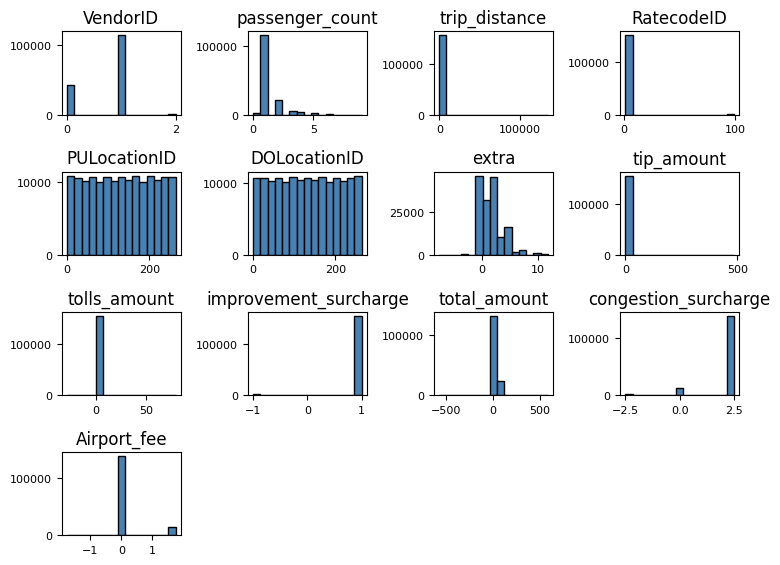

In [85]:
x_train.hist(bins= 15, color= 'steelblue', edgecolor='black', linewidth= 1.0,
             xlabelsize= 8, ylabelsize= 8, grid= False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

### plotting pair waise plot for corelation detection

In [11]:
# sns.pairplot(X) ## Do not run this cell again
#* please prefer pairplot.png for details

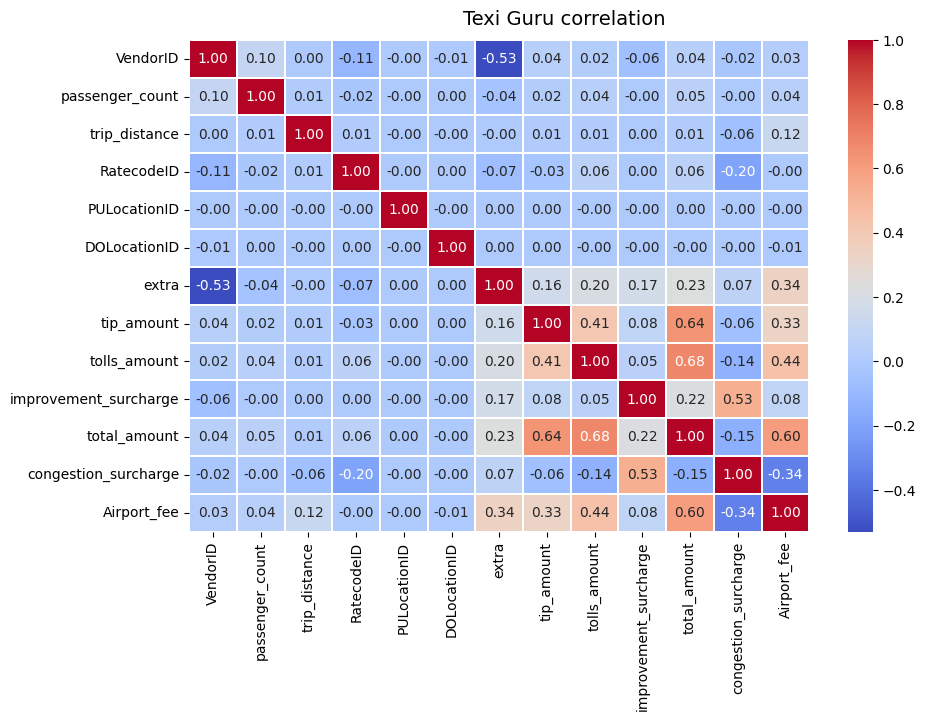

In [86]:
f, ax = plt.subplots(figsize=(10,6))
corr = x_train.corr(numeric_only= True)
heat_map = sns.heatmap(round(corr, 2), annot= True, ax=ax, cmap='coolwarm',
                       fmt='.2f', linewidths=0.05)
f.subplots_adjust(top= 0.93)
t = f.suptitle('Texi Guru correlation', fontsize= 14)


#### Converting datetime into datetime object

In [87]:
def convert_dt_obj_to_datetime(df:pd.DataFrame, col_name:str):
    df[col_name] = pd.to_datetime(df[col_name])
    df[col_name +'_Year'] = df[col_name].apply(lambda time: time.year)
    df[col_name +'_Month'] = df[col_name].apply(lambda time: time.month)
    df[col_name +'_Day'] = df[col_name].apply(lambda time: time.day)
    df[col_name +'_Hour'] = df[col_name].apply(lambda time: time.hour)
#     df[col_name +'_Minute'] = df[col_name].apply(lambda time: time.minute) # IGNORING MINS

In [88]:
x_train, x_test = x_train_copy.copy(), x_test_copy.copy()

convert_dt_obj_to_datetime(x_train, 'tpep_pickup_datetime')
convert_dt_obj_to_datetime(x_test, 'tpep_pickup_datetime')
x_train = x_train.drop('tpep_pickup_datetime', axis= 1)
x_test = x_test.drop('tpep_pickup_datetime', axis= 1)

convert_dt_obj_to_datetime(x_train, 'tpep_dropoff_datetime')
convert_dt_obj_to_datetime(x_test, 'tpep_dropoff_datetime')

x_train = x_train.drop('tpep_dropoff_datetime', axis= 1)
x_test = x_test.drop('tpep_dropoff_datetime', axis= 1)

x_train.info()
x_train_copy, x_test_copy = x_train.copy(), x_test.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 157500 entries, 96052 to 134508
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   VendorID                     157500 non-null  int64  
 1   passenger_count              151993 non-null  float64
 2   trip_distance                157500 non-null  float64
 3   RatecodeID                   151993 non-null  float64
 4   store_and_fwd_flag           151993 non-null  object 
 5   PULocationID                 157500 non-null  int64  
 6   DOLocationID                 157500 non-null  int64  
 7   payment_type                 157500 non-null  object 
 8   extra                        157500 non-null  float64
 9   tip_amount                   157500 non-null  float64
 10  tolls_amount                 157500 non-null  float64
 11  improvement_surcharge        157500 non-null  float64
 12  total_amount                 157500 non-null  float64
 13  

In [89]:
x_train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,...,congestion_surcharge,Airport_fee,tpep_pickup_datetime_Year,tpep_pickup_datetime_Month,tpep_pickup_datetime_Day,tpep_pickup_datetime_Hour,tpep_dropoff_datetime_Year,tpep_dropoff_datetime_Month,tpep_dropoff_datetime_Day,tpep_dropoff_datetime_Hour
count,157500.000000,151993.000000,157500.000000,151993.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,...,151993.000000,151993.000000,157500.0,157500.000000,157500.000000,157500.000000,157500.0,157500.000000,157500.000000,157500.000000
mean,0.728387,1.357563,5.309915,1.517925,132.708279,132.638337,1.932756,6.123788,0.648311,0.979841,...,2.247011,0.159108,2023.0,6.004184,29.062984,15.113422,2023.0,6.007778,28.968070,15.102057
std,0.445648,0.891166,416.332711,6.509781,76.147335,76.226352,1.948017,4.627141,2.334469,0.197994,...,0.818409,0.512204,0.0,0.064550,1.962362,5.772375,0.0,0.087848,2.582298,5.949174
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,...,-2.500000,-1.750000,2023.0,6.000000,1.000000,0.000000,2023.0,6.000000,1.000000,0.000000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.472201,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,29.000000,11.000000,2023.0,6.000000,29.000000,11.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.284655,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,29.000000,16.000000,2023.0,6.000000,29.000000,17.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.501940,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,30.000000,20.000000,2023.0,6.000000,30.000000,20.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,...,2.500000,1.750000,2023.0,7.000000,30.000000,23.000000,2023.0,7.000000,30.000000,23.000000


### trying to remove outliers form the dataset

In [140]:
x_train = x_train_copy.copy() # reseting dataset
print('len of wallet user', len(x_train[x_train.payment_type == 'Wallet']))
train_pd_filtered_toll_amt = x_train[(x_train.tolls_amount >= 0)]
print('len of wallet user', len(train_pd_filtered_toll_amt[train_pd_filtered_toll_amt.payment_type == 'Wallet']))
train_pd_filtered_extra = train_pd_filtered_toll_amt[(train_pd_filtered_toll_amt.extra >= 0)]
print('len of wallet user', len(train_pd_filtered_extra[train_pd_filtered_extra.payment_type == 'Wallet']))
# train_pd_filtered_airport_fee = train_pd_filtered_extra.copy() # TODO: need to check for batter solution 
print('airport unique values before filter', train_pd_filtered_extra.Airport_fee.unique())
train_pd_filtered_airport_fee =  train_pd_filtered_extra[(train_pd_filtered_extra.Airport_fee != -1.75)]
print('airport unique values after filter', train_pd_filtered_airport_fee.Airport_fee.unique())
print('len of wallet user', len(train_pd_filtered_airport_fee[train_pd_filtered_airport_fee.payment_type == 'Wallet']))
## same assumption with negative congestion surcharge and improvement surcharge
train_pd_filtered_improvement_surcharge = train_pd_filtered_airport_fee[(train_pd_filtered_airport_fee.improvement_surcharge >= 0)]
print('len of wallet user', len(train_pd_filtered_improvement_surcharge[train_pd_filtered_improvement_surcharge.payment_type == 'Wallet']))
print('congestion surcharge unique', train_pd_filtered_improvement_surcharge['congestion_surcharge'].unique())
train_pd_filtered_congestion_surcharge = train_pd_filtered_improvement_surcharge.copy() #TODO: need to check batter solution
# train_pd_filtered_congestion_surcharge = train

print('len of wallet user', len(train_pd_filtered_congestion_surcharge[train_pd_filtered_congestion_surcharge.payment_type == 'Wallet']))

x_train = train_pd_filtered_congestion_surcharge.copy()
print('vendor ids after outlier removal', x_train.VendorID.unique())

# x_train.info()
print('len of wallet user', len(x_train[x_train.payment_type == 'Wallet']))


len of wallet user 5507
len of wallet user 5507
len of wallet user 5507
airport unique values before filter [ 0.    1.75   nan -1.75]
airport unique values after filter [0.   1.75  nan]
len of wallet user 5507
len of wallet user 5507
congestion surcharge unique [2.5 0.  nan]
len of wallet user 5507
vendor ids after outlier removal [0 1 2]
len of wallet user 5507


In [144]:
### removing distance outliers
print(len(x_train[x_train.trip_distance > 100]))
x_train_distance_fitler = x_train[x_train.trip_distance <= 100]
x_train = x_train_distance_fitler.copy()
print('vendor ids after outlier removal', x_train.VendorID.unique())
print('len of wallet user', len(x_train[x_train.payment_type == 'Wallet']))

7
vendor ids after outlier removal [0 1 2]
len of wallet user 5504


**X_train after applying basic filteration of the data**

In [145]:
x_train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,...,congestion_surcharge,Airport_fee,tpep_pickup_datetime_Year,tpep_pickup_datetime_Month,tpep_pickup_datetime_Day,tpep_pickup_datetime_Hour,tpep_dropoff_datetime_Year,tpep_dropoff_datetime_Month,tpep_dropoff_datetime_Day,tpep_dropoff_datetime_Hour
count,155953.000000,150449.000000,155953.000000,150449.000000,155953.000000,155953.000000,155953.000000,155953.000000,155953.000000,155953.000000,...,150449.000000,150449.000000,155953.0,155953.000000,155953.000000,155953.000000,155953.0,155953.000000,155953.000000,155953.000000
mean,0.725699,1.357284,3.676391,1.521047,132.695184,132.608767,1.965187,6.158330,0.659844,0.999391,...,2.290544,0.163381,2023.0,6.004181,29.062346,15.116901,2023.0,6.007765,28.967695,15.106724
std,0.447024,0.892171,4.841920,6.542640,76.133687,76.204144,1.924313,4.633221,2.332493,0.022384,...,0.692656,0.509141,0.0,0.064524,1.961680,5.767669,0.0,0.087778,2.580371,5.944338
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000275,0.000000,0.000000,...,0.000000,0.000000,2023.0,6.000000,1.000000,0.000000,2023.0,6.000000,1.000000,0.000000
25%,0.000000,1.000000,1.090000,1.000000,67.000000,67.000000,0.000000,3.505370,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,29.000000,11.000000,2023.0,6.000000,29.000000,11.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,132.000000,2.500000,5.326153,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,29.000000,16.000000,2023.0,6.000000,29.000000,17.000000
75%,1.000000,1.000000,3.620000,1.000000,199.000000,198.000000,2.500000,7.530813,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,30.000000,20.000000,2023.0,6.000000,30.000000,20.000000
max,2.000000,9.000000,84.160000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,...,2.500000,1.750000,2023.0,7.000000,30.000000,23.000000,2023.0,7.000000,30.000000,23.000000


#### Basic outlier removal completed 


### Creating pipeline for linear regression and SGD Regression
* create pipelines for features scaling
* create shufflesplit for cross validation

In [146]:
cv_shuffle_20 = ShuffleSplit(n_splits= 20, test_size= 0.2)
cv_shuffle_5 = ShuffleSplit(n_splits= 5, test_size= 0.2)

In [147]:
x_train_filtered_copy = x_train.copy()

In [148]:
x_train = x_train_filtered_copy.copy()
x_test = x_test_copy.copy()
y_train = x_train['total_amount']
x_train = x_train.drop('total_amount', axis= 1)
y_test = x_test['total_amount']
x_test = x_test.drop('total_amount', axis= 1)

### dividing train set into com_train_set and dev_train_set


In [149]:
com_train_features, dev_test_features, com_train_labels, dev_test_labels = train_test_split(x_train, y_train, test_size= 0.2)

#### Creating pipelines for features scaling

In [150]:
vendor_id_pipe = Pipeline([
  ('one_hot_encoder', OneHotEncoder())
])
passanger_count_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 1)),
    ('std_scaler', StandardScaler())
])

rate_code_id_pipe = Pipeline([
       ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant',
                                         fill_value= 1)),
       ('one_hot_encoder', OneHotEncoder())
])

store_and_fwd_pipe = Pipeline([
    ('simple_immmputer', SimpleImputer(missing_values= np.nan, strategy='constant', fill_value='N')),
    ('one_hot_encoder', OneHotEncoder())
])
congestion_charger_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0)),
    ('std_scaler', StandardScaler())
])

airport_fee_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0)),
    ('std_scale', StandardScaler())
])

payment_type_pipe = Pipeline([
    ('one_hot_encoder', OneHotEncoder())
])

In [151]:
feature_scaline_pipeline = ColumnTransformer([
  ('vendor_id', vendor_id_pipe, ['VendorID']),
  ('passanger_count', passanger_count_pipe, ['passenger_count']),
  ('rate_code_id', rate_code_id_pipe, ['RatecodeID']), # experimental changes
  ('s_nd_f_flag', store_and_fwd_pipe, ['store_and_fwd_flag']),
  ('pu_loc', StandardScaler(), ['PULocationID']),
  ('du_loc', StandardScaler(), ["DOLocationID"]),
  ('payment_t', payment_type_pipe, ['payment_type']),
  ('extra_t', StandardScaler(), ['extra']),
  ('tip_amount_t', StandardScaler(), ['tip_amount']),
  ('tolls_amount_t', StandardScaler(), ["tolls_amount"]),
  ('improvement_c', StandardScaler(), ['improvement_surcharge']),
  ('cong_charge', congestion_charger_pipe, ['congestion_surcharge']),
  ('Airport_fee_t', airport_fee_pipe, ['Airport_fee']),
  ('std_scaler', StandardScaler(), [i for i in range(14, 22)])
], remainder='passthrough')
feature_scaline_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('vendor_id',
                                 Pipeline(steps=[('one_hot_encoder',
                                                  OneHotEncoder())]),
                                 ['VendorID']),
                                ('passanger_count',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=1,
                                                                strategy='constant')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['passenger_count']),
                                ('rate_code_id',
                                 Pipeline(steps=[('simple_imputer',
                                                  Simple...
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['congestion_surcharge']),
                                ('Airport_fee_t',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('std_scale',
                                                  StandardScaler())]),
                                 ['Airport_fee']),
                                ('std_scaler', StandardScaler(),
                                 [14, 15, 16, 17, 18, 19, 20, 21])])

### creating a linear regression model

In [152]:
lin_reg_pipeline = Pipeline([
  ('feature_scaling', feature_scaline_pipeline),
  ('lin_reg', LinearRegression())
])

lin_reg_pipeline.fit(com_train_features, com_train_labels)

Pipeline(steps=[('feature_scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vendor_id',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder())]),
                                                  ['VendorID']),
                                                 ('passanger_count',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['passenger_count']),
                                                 ('rate_code_id',
                                                  Pipel...
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['congestion_surcharge']),
                                                 ('Airport_fee_t',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scale',
                                                                   StandardScaler())]),
                                                  ['Airport_fee']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  [14, 15, 16, 17, 18, 19, 20,
                                                   21])])),
                ('lin_reg', LinearRegression())])

In [153]:
lin_reg_pipeline.score(com_train_features, com_train_labels)

0.9114196503192428

In [154]:
lin_reg_pipeline.score(dev_test_features, dev_test_labels)

0.8979630172115898

## transforming test

In [155]:
# x_test_t = lin_reg_pipeline.transform(x_test)
print(x_train.VendorID.unique())
print(x_test.VendorID.unique())

# x_test_t = feature_scaline_pipeline.transform(x_test)
lin_reg_pipeline.score(x_test, y_test)

[0 1 2]
[1 0 2]


0.8531697709015997